# Modelos de clasificación del modelo 

En este notebook se harán diversas clasificaciones del conjunto de datos, con el objetivo de tener una visión clara y precisa de los diferentes grupos presentes en lo datos

## Bibliotecas


In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

### Importación de los datos

In [2]:
TEST_SPLIT_SIZE = 0.3
RANDOM_STATE = 37

data = pd.read_csv("proy_escuela_dev.csv")


In [3]:
display(data.head())

,id_estudiante_proy,dni,campus,titulacion,nombre,apellidos,sexo,edad,direccion,telefono1,...,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3,usuario_alta_datos
0,511,3090960be7fa45d5a21095a83ff9c1da,A Coruña,f1bfc2083f3c4ebcbcd8b2a48321f02a,8de7accc8a1b46e898004872c337bc54,df6e785eb9bd4823bf8d78fc8a8678d5,V,15.0,9dc09f819a794b45bda34811a85de8ce,61fcce5da8ff4b64b7585cfead129b79,...,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0,juan.perez
1,255,efb6ca5df4824879b8b49d892d792e55,A Coruña,d23620300d7d42209fd7f4fc2fe34ce6,9d0e43d9473441569f5cabe2d3cf9264,3319d9e345594fa2a3bd8e2c1cde3615,NaN,NaN,ec3b98dee65c4815b8f1bb292df3141a,c40f375cf9184d1b8ef609b33d053850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usuario_secretaria_1
2,377,816fcb104f8242aa802a5c10a32d40da,Vigo,fcfc3c42ec3e41acb44fd74494985d8b,a2dfbb29afbe47e4aa665a2f118b8c1d,79cd61bee7ee4ef6822fd8db5c2ecbe6,M,18.0,b6faa3f203ad4ca982015fef93ad7274,d1d28dc0c03f4b7b93300cd145d7cfae,...,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0,admin
3,642,c8b5aff68b524a139106d3a98b4d5cbe,A Coruña,848dd3d4434b42dfa9a886213834afc4,21cf8472cd584674959196938de9173d,bb318ec4f00b4d6dab1d7ec5cb69c8fb,V,17.0,b11f9c14753e4854bfad96b5cc81d6af,5952ab314d7b476787a8c7db980962f0,...,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0,us_direccion_1
4,318,66ddb021477d4893bb9408e273c58aef,A Coruña,26878c9a3e2c4c349f1ae828b3863eac,02ec3fa3ac634be0adc4a66010925f2d,a0244cbc1a1849d2b5f4e8ef892ba808,M,18.0,a95f987985974bb59371b23abcb26f31,c52a8eb815b04f59b44a607f9992aa9f,...,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0,juan.perez


### Eliminación de columnas irrelevantes para el análisis 

Las siguientes columnas resultan irrelevantes para el análisis, debido a que se encuentran como un conjunto de caracteres que nos lleva a pensar en que resultan ser datos cifrados.

Aunque no estuviesen cifrados, tampoco serían relevantes para el análisis dado el contexto del problema, que es clasificar a aquellos alumnos que vayan a tener beca o no en base al percentil 90 de notas. 

Dichas columnas son:

- **id_estudiante_proy**.
- **dni**.
- **nombre**.
- **apellidos**.
- **direccion**.
- **telefono1**.
- **telefono2**.
- **email**.
- **fecha_nacimiento**.
- **usuario_alta_datos**.
-**titulacion**.


In [4]:
# Paso 1: Eliminar columnas irrelevantes
# Estas columnas son identificadores o irrelevantes para el análisis
columns_to_drop = [
    "id_estudiante_proy", "dni", "nombre", "apellidos", 
    "direccion", "telefono1", "telefono2", "email", 
    "fecha_nacimiento", "usuario_alta_datos", "titulacion", 
]

data = data.drop(columns=columns_to_drop)

data.head()

,campus,sexo,edad,entorno_vivienda,tamano_familia,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
0,A Coruña,V,15.0,urbano,<=3,independizado,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
1,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vigo,M,18.0,rural,>3,independizado,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
3,A Coruña,V,17.0,urbano,>3,independizado,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
4,A Coruña,M,18.0,urbano,>3,independizado,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0


#### Creación de columna con promedio de notas

Se juntan las 3 notas en una nueva columna, denominada promedio_notas.

In [5]:
# Seleccionar las columnas 'nota1', 'nota2' y 'nota3' 
data["promedio_notas"] = data[["nota1", "nota2", "nota3"]].mean(axis=1, skipna=True)

### Creación de las columna beca, con 0 como no y 1 como si

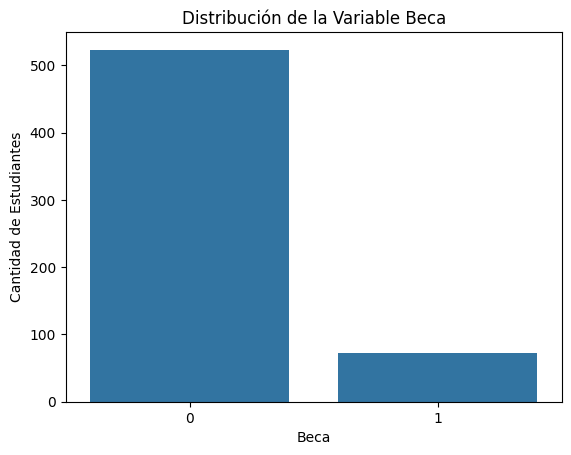

In [6]:
# Calcular el percentil 90 de la columna 'promedio_notas'
percentil_90 = data['promedio_notas'].quantile(0.90)

# Crear la nueva columna 'beca' basada en el percentil 90
data['beca'] = data['promedio_notas'] >= percentil_90

# Asegurarse de que no haya valores NaN en la columna 'beca'
data['beca'] = data['beca'].fillna(False)

# Convertir los valores booleanos a enteros (0 y 1)
data['beca'] = data['beca'].astype(int)

# Crear un gráfico de barras para la variable 'beca'
sns.countplot(x='beca', data=data)
plt.xlabel('Beca')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Distribución de la Variable Beca')
plt.show()

#### Eliminacion de valores faltantes

Se eliminan los valores faltantes en algunas de las columnas. Hay pocos valores faltantes, por lo que sustituir con el promedio puede ser más perjudicial que eliminarlos directamnete.

In [7]:
# Selección de las variables numéricas
numeric_cols = data.select_dtypes(include=['number']).columns

data = data.dropna(subset=numeric_cols)

print(numeric_cols)

Index(['edad', 'educacion_madre', 'educacion_padre', 'tiempo_viaje',
       'tiempo_estudio', 'relacion_familiar', 'tiempo_libre', 'salir_amigos',
       'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana',
       'salud', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3',
       'promedio_notas', 'beca'],
      dtype='object')


#### Conversion de variables categoricas a dummies


In [8]:
# Seleccionar columnas categóricas
categorical_columns =data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['campus', 'sexo', 'entorno_vivienda', 'tamano_familia',
       'independizado_padres', 'ocupacion_madre', 'ocupacion_padre',
       'razon_matricula', 'interes_educacion_superior', 'internet_casa',
       'apoyo_escolar', 'apoyo_familiar', 'actividades', 'relacion_romantica'],
      dtype='object')


In [9]:
# Seleccionar columnas que contienen valores de tipo string (object)
string_columns = data.select_dtypes(include=['object']).columns

# Comprobar si tienen valores típicos de sí/no
# Definir una lista de valores que queremos unificar
values_to_replace = {'si': True, 'yes': True, 'no': False, 'no ': False, 'yes ': True, 0.0: False, 1.0: True}

# Iterar por las columnas que contienen strings
for col in string_columns:
    # Reemplazar los valores en esas columnas
    if data[col].isin(values_to_replace.keys()).any():
        data[col] = data[col].replace(values_to_replace)

# Convertir las columnas afectadas a tipo booleano
data[string_columns] = data[string_columns].astype(bool)

# Verificar los cambios en las primeras filas de las columnas modificadas
print(data[string_columns].head())




   campus  sexo  entorno_vivienda  tamano_familia  independizado_padres  \
0    True  True              True            True                  True   
2    True  True              True            True                  True   
3    True  True              True            True                  True   
4    True  True              True            True                  True   
5    True  True              True            True                  True   

   ocupacion_madre  ocupacion_padre  razon_matricula  \
0             True             True             True   
2             True             True             True   
3             True             True             True   
4             True             True             True   
5             True             True             True   

   interes_educacion_superior  internet_casa  apoyo_escolar  apoyo_familiar  \
0                        True           True          False            True   
2                        True           True          

In [10]:
# Crear dummies para las columnas categóricas
data = pd.get_dummies(data, columns=categorical_columns)

# Mostrar el DataFrame resultante
display(data)



,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,internet_casa_False,internet_casa_True,apoyo_escolar_False,apoyo_escolar_True,apoyo_familiar_False,apoyo_familiar_True,actividades_False,actividades_True,relacion_romantica_False,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,False,True,True,False,False,True,False,True,True,False
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,False,True,True,False,True,False,True,False,False,True
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,False,True,True,False,False,True,False,True,True,False
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,False,True,False,True,False,True,False,True,False,True
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,False,True,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,False,True,False,True,False,True,False,True,False,True
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,False,True,True,False,False,True,True,False,False,True
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,False,True,True,False,True,False,True,False,True,False
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,False,True,False,True,False,True,False,True,False,True


Eliminar dummies innecesarias

In [11]:

dummies_a_eliminar = ["internet_casa_False",
                       "apoyo_escolar_False", 
                       "apoyo_familiar_False", 
                       "actividades_False", 
                      "relacion_romantica_False"
                      , "interes_educacion_superior_False"]

data = data.drop(columns = dummies_a_eliminar)

display(data)

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,True,True,True,True,True,True,False,True,True,False
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,True,True,True,True,True,True,False,False,False,True
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,True,True,True,True,True,True,False,True,True,False
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,True,True,True,True,True,True,True,True,True,True
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,True,True,True,True,True,True,True,True,True,True
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,True,True,True,True,True,True,False,True,False,True
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,True,True,True,True,True,True,False,False,False,False
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,True,True,True,True,True,True,True,True,True,True


In [12]:
# Seleccionar solo las columnas booleanas y convertirlas
boolean_columns = data.select_dtypes(include=[bool]).columns
data[boolean_columns] = data[boolean_columns].astype(int)

# Verificar los cambios
display(data)


,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,0
2,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,1
3,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,1,1,1,1,1,1,0,1,1,0
4,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
5,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,17.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,1,1,1,1,1,1,1,1,1,1
591,18.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,...,1,1,1,1,1,1,0,1,0,1
592,17.0,4.0,3.0,2.0,2.0,5.0,5.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,0
593,17.0,3.0,4.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,...,1,1,1,1,1,1,1,1,1,1


### Creación de un csv con los datos para clasificación
Para tener a mano estos datos y por si son necesarios a la hora de realizar clusterización, se creará un csv a partir de este dataframe

In [ ]:
data.to_csv('datos_clasificacion.csv', index=False)

### Creación de datos de partición entrenamiento y test


In [13]:
from sklearn.model_selection import train_test_split


y_data = data["beca"]

x_data = data.drop("beca", axis=1)


x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE
)

x_train.shape, x_test.shape, y_train.shape , y_test.shape


((410, 31), (177, 31), (410,), (177,))

### Entrenamiento de los modelos

#### Función selectora del mejor modelo en base a acurracy score 

In [14]:
def comparar_accuracy(*accuracy_scores):
    """
    Compara múltiples valores de accuracy_score para determinar cuál es el mayor y 
    calcula las diferencias con respecto a los demás.

    Parámetros:
    - *accuracy_scores: Valores de accuracy_score a comparar. 
    Se pueden proporcionar múltiples valores gracias a usar xargs.

    Retorno:
    - Ninguno (función de comparación).
    Con llamada a función:
        Índice del mejor modelo.
        Diferencia del valor de accuracy_score frente a los siguientes.
    """
    # Encontrar el accuracy_score máximo y su índice
    mejor_accuracy = max(accuracy_scores)
    mejor_modelo_index = accuracy_scores.index(mejor_accuracy) + 1  

    # Calcular las diferencias con respecto al mejor accuracy_score
    diferencias = [mejor_accuracy - acc for acc in accuracy_scores if acc != mejor_accuracy]

    # Mostrar resultados
    print(f"El modelo con el mayor accuracy_score es el Modelo {mejor_modelo_index} con un valor de {mejor_accuracy:.4f}.")
    if diferencias:
        print(f"La diferencia con los otros modelos es: {[f'{d:.4f}' for d in diferencias]}")

# Ejemplo de uso
accuracy_scores = [0.85, 0.88, 0.90]

comparar_accuracy(*accuracy_scores)

El modelo con el mayor accuracy_score es el Modelo 3 con un valor de 0.9000.
La diferencia con los otros modelos es: ['0.0500', '0.0200']


#### Regresión logística

Cross-Validation Accuracy Scores: [0.98780488 0.98780488 0.98780488 0.98780488 0.98780488]
Mean CV Accuracy: 0.9878048780487806

Accuracy (Test): 0.9830508474576272

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.83      0.91        18

    accuracy                           0.98       177
   macro avg       0.99      0.92      0.95       177
weighted avg       0.98      0.98      0.98       177



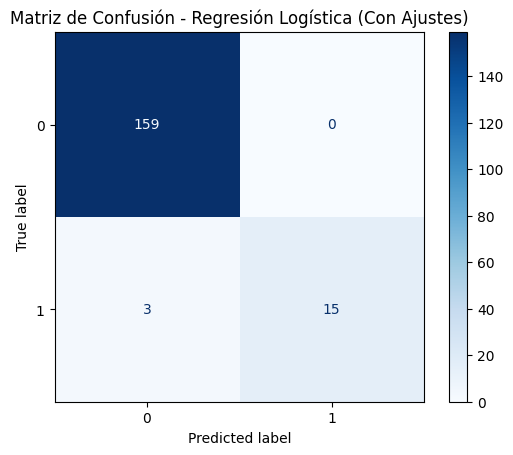

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Crear un pipeline con escalado
pipeline_rlo = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

# Validación cruzada
cv_scores = cross_val_score(pipeline_rlo, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Entrenamiento y predicción
pipeline_rlo.fit(x_train, y_train)
y_pred = pipeline_rlo.predict(x_test)

# Evaluación en datos de prueba
accuracy_rlo = accuracy_score(y_test, y_pred)
print("\nAccuracy (Test):", accuracy_rlo)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline_rlo[-1].classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Matriz de Confusión - Regresión Logística (Con Ajustes)")
plt.show()


#### SVM

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=10.0, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, 

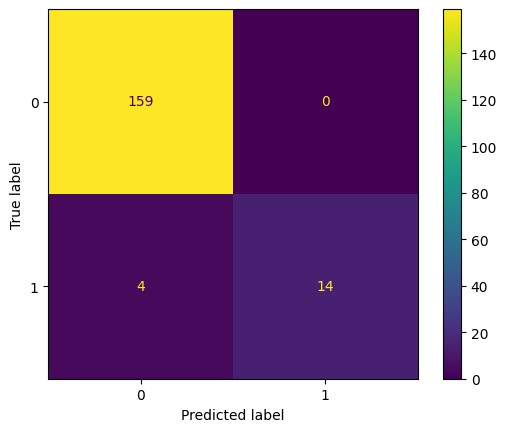

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import numpy as np

# Parámetros para la búsqueda aleatoria
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# RandomizedSearchCV para SVM
random_search_svm = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_svm.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_svm = random_search_svm.best_estimator_
print("Mejores parámetros SVM:", random_search_svm.best_params_)

# Evaluación con los datos de prueba
y_pred = best_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - SVM:", accuracy_svm)
print("Classification Report - SVM:\n", classification_report(y_test, y_pred))
# Comparacion de modelos 
# Comparar ambos accuracies
comparar_accuracy(accuracy_rlo, accuracy_svm)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_svm, x_test, y_test)



#### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Usar 'sqrt' o 'log2' en lugar de 'auto'
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))



comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30

## Elección del modelo random forest


Según la puntuación de exactitud, accuracy_score, el modelo 3 o el modelo de Random Forest es el que arroja el mejor resultado de los 3. No obstante, en la anterior implementación, no se han ajustado algunos parámetros como su máxima profundidad.

Aunque Random Forest se trate de un modelo robusto al overfitting y al que ya se le está haciendo validación cruzada, puede verse comprometido si no se ajustan algunos de sus parámetros.

Por tanto, a continuación se hará una **gráfica de la curva de aprendizaje** con el objetivo de observar si se está dando un sobreajuste.

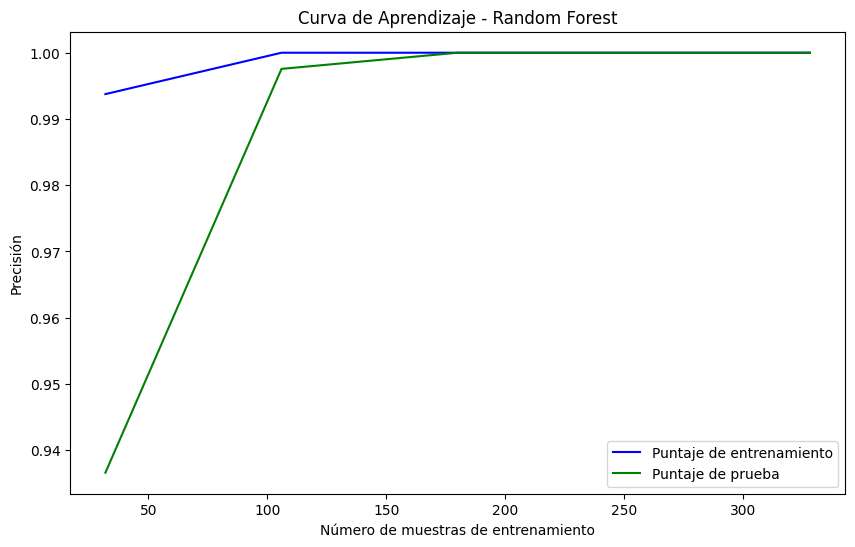

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()


#### Conclusión: posibilidad de persistencia de sobreajuste

El hecho de que el puntaje de entrenamiento se mantenga estable en el 1 desde el principio da lugar a un posible sobreajuste. En modelos con muchos parámetros o muy feibles (como el caso de random forest muy produndos o con muchas características), el modelo podría estar **memorizando** los datos de entrenamiento en vez de aprender patrones generales. 

Random Forest, aunque generalmente es robusto, puede caer en este comportamiento si se ajusta sin restricciones (por ejemplo, sin un límite en la profundidad de los árboles o en el número de muestras mínimas por hoja). Si el modelo tiene una alta capacidad para ajustarse a los datos de entrenamiento, puede llegar a predecir perfectamente (puntaje 1) todas las muestras de entrenamiento

Esto tiene sentido si se tiene en cuenta que este random forest no ha sido regularizado adecuadamente. Por tanto, a continuación se harán los siguientes ajustes al modelo, entre otros:

- **Limitar profundidad máxima de los árboles (max_depth)**
- **Aumentar el número mínimo de muestrar para dividir un nodo (min_samples_split)**: aumentar su valor fuerza a que haya un número mínimo de muestras para dividir un nodo. Esto ayuda a evitar que el modelo se ajuste a ruidos o detalles irrelevantes.
- **Aumentar número mínimo de muestras por hoja (min_samples_split)**: este parámetro contorla el número mínimo de muestras en una hoja del árbol. Aumentarlo puede evitar que el modelo se ajuste a casos específicos o pequeños detalles en los datos.


In [19]:
# Parámetros para la búsqueda aleatoria
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 20, 30],  # Menor profundidad para evitar sobreajuste
    'min_samples_split': [2, 10, 20],  # Aumentar el valor para evitar ajustes excesivos
    'min_samples_leaf': [1, 2, 4],  # Aumentar para evitar aprender patrones triviales
    'max_features': ['sqrt', 'log2', 0.5],  # Limitar las características usadas por cada árbol
    'oob_score': [True],  # Habilitar Out-of-Bag scoring para validación interna
}

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=5,       # Validación cruzada
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo
random_search_rf.fit(x_train, y_train)

# Mejor estimador y parámetros encontrados
best_rf = random_search_rf.best_estimator_
print("Mejores parámetros Random Forest:", random_search_rf.best_params_)

# Evaluación con los datos de prueba
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy (Test) - Random Forest:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred))

# Comparación de la precisión entre modelos
comparar_accuracy(accuracy_rlo, accuracy_svm, accuracy_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100, oob_score=True; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; t

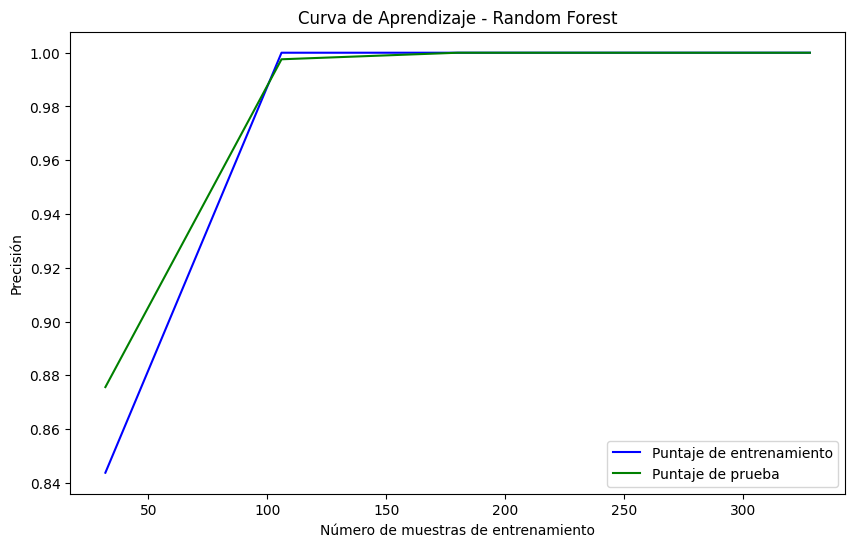

In [20]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Promedio de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Puntaje de entrenamiento', color='blue')
plt.plot(train_sizes, test_mean, label='Puntaje de prueba', color='green')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Random Forest')
plt.legend(loc="best")
plt.show()


### Justificación de la corrección del sobreajuste (Overfitting)

**Antes de los ajustes**:  
El puntaje de entrenamiento aumentaba rápidamente hasta 1, mientras que el puntaje de prueba crecía lentamente, lo que indicaba un sobreajuste. El modelo estaba memorizando los datos de entrenamiento pero no generalizaba bien a los datos de prueba.

**Después de los ajustes**:  
Se ajustaron parámetros como la profundidad máxima (`max_depth`), el número mínimo de muestras para dividir (`min_samples_split`) y para ser hoja (`min_samples_leaf`). Estos cambios ayudaron a limitar la complejidad del modelo y evitar que los árboles se ajustaran demasiado a los datos de entrenamiento.

**Resultados**:  
- El puntaje de entrenamiento ya no comenzó desde 1. En cambio, comenzó en 0.825 y fue creciendo de manera progresiva hasta estabilizarse cerca de 1 a partir de la iteración 120.
- El puntaje de prueba mejoró de forma más continua y estable, indicando que el modelo estaba aprendiendo patrones más generales que se aplican tanto a los datos de entrenamiento como a los de prueba.

**Conclusión**:  
El ajuste de parámetros corrigió el sobreajuste, logrando un modelo más equilibrado con mejor capacidad de generalización, lo que se refleja en una curva de aprendizaje más estable entre los datos de entrenamiento y prueba.


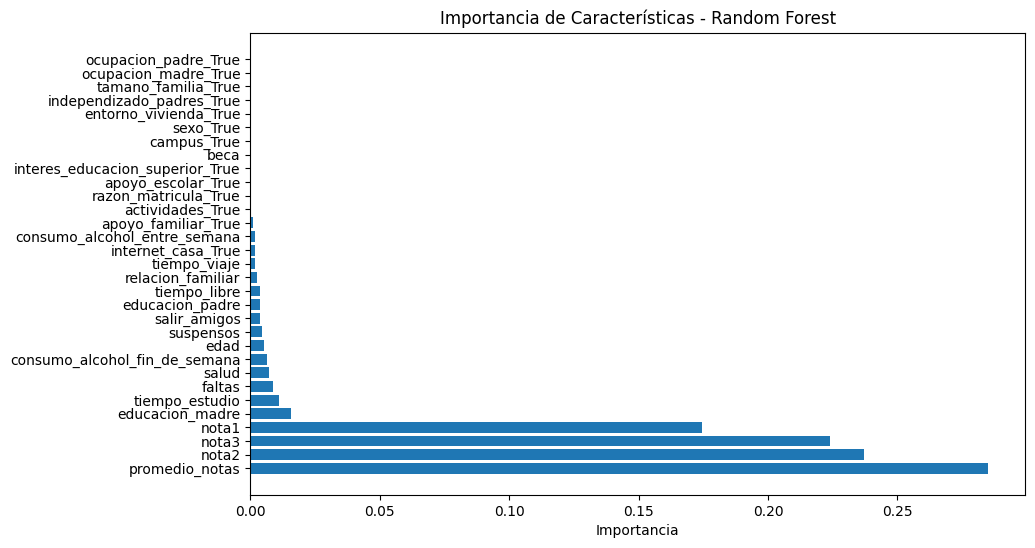

In [21]:
import matplotlib.pyplot as plt

# Obtener las importancias
importances = best_rf.feature_importances_

# Obtener los nombres de las características desde el DataFrame
feature_names = data.columns  # Asumiendo que 'data' es tu DataFrame con las características

# Ordenar las características por su importancia
indices = np.argsort(importances)[::-1]

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Características - Random Forest")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])  # Usando los nombres de las características
plt.xlabel("Importancia")
plt.show()


### Conclusiones del modelo

